In [2]:
spark

In [156]:
import json
import numpy as np
import time
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from operator import add

In [66]:
def preprocessing(data):
    print("data preprocessing...")
    data = data.filter((data.inflow_channel == "i") & (data.tabcode == "tot"))
    print("data preprocessing complete")
    return data

def make_df(path):
    print("data load...")
    return spark.read.json(path)

def get_count_info(data):
    print("collection info load...")
    return data.filter(data.display.SER.isNotNull()).select("display.SER.code","display.SER.doc_count")

def make_count_dict(list_data):
    print("make dict...")
    res = {}
    for meta in list_data:
        for i, meta_code in enumerate(meta[0]):
            if meta_code not in res.keys():
                res[meta_code] = meta[1][i]
            else:
                res[meta_code] += meta[1][i]
    print("making dict complete")
    return res

In [172]:
mobile_data_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=Mobile/Kind=Query/Year=2019/Month=07/Day=14/Hour=20'
pc_data_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=PC/Kind=Query/Year=2019/Month=07/Day=14/Hour=20'
mobile_df = preprocessing(make_df(mobile_data_path))
pc_df = preprocessing(make_df(pc_data_path))
ser_mobile_list = get_count_info(mobile_df).collect()
ser_pc_list = get_count_info(pc_df).collect()
mobile_res = make_count_dict(ser_mobile_list)
pc_res = make_count_dict(ser_pc_list)

data load...
data preprocessing...
data preprocessing complete
data load...
data preprocessing...
data preprocessing complete
collection info load...
collection info load...
make dict...
making dict complete
make dict...
making dict complete


In [35]:
values = []
for key in mobile_res.keys():
    values.append(mobile_res[key])
values = sorted(values, reverse=True)

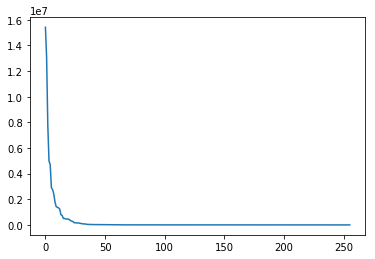

In [36]:
plt.plot(values)
plt.show()

In [32]:
values = []
for key in pc_res.keys():
    values.append(pc_res[key])
values = sorted(values, reverse=True)

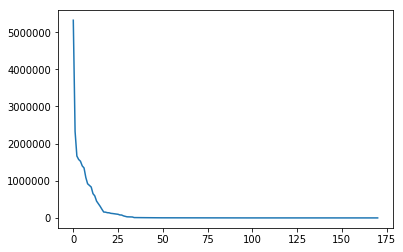

In [33]:
plt.plot(values)
plt.show()

In [32]:
ser_pc_docid.printSchema()

root
 |-- code: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- documents: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- id: string (nullable = true)
 |    |    |    |-- subcode: string (nullable = true)



In [191]:
def extract_unique_doc(data):
    print ("extracting ...")
    return data.rdd.flatMap(lambda x : x["display"]["SER"]).map(lambda x : (x["code"],x["documents"]))\
            .flatMapValues(lambda x : x).map(lambda x : ((x[0],x[1]["id"]),1)).reduceByKey(add)\
            .map(lambda x : (x[0][0],1)).reduceByKey(add).sortBy(lambda x : x[1], False)

In [192]:
extract_unique_doc(pc_df).collect()

extracting ...


[(u'IIM', 2653484),
 (u'BR1', 677514),
 (u'WSA', 635012),
 (u'CCB', 611531),
 (u'NNS', 582282),
 (u'VO2', 466718),
 (u'SNP', 355869),
 (u'NKS', 353009),
 (u'IVR', 231400),
 (u'GG2', 187710),
 (u'BRC', 104927),
 (u'SNM', 99810),
 (u'KAS', 95854),
 (u'1DV', 88059),
 (u'0PL', 88017),
 (u'W77', 74894),
 (u'LB2', 62119),
 (u'KOQ', 58960),
 (u'MS2', 40585),
 (u'0SC', 37177),
 (u'0WD', 35447),
 (u'RP1', 24318),
 (u'AYF', 22715),
 (u'DIC', 22348),
 (u'0BL', 19728),
 (u'0DL', 13832),
 (u'PRF', 12679),
 (u'EM1', 8135),
 (u'L7T', 5046),
 (u'TVP', 4689),
 (u'1SB', 4375),
 (u'GG3', 3930),
 (u'P5T', 3793),
 (u'DIA', 3531),
 (u'AEZ', 3238),
 (u'CRW', 2965),
 (u'GG1', 2943),
 (u'GYB', 2110),
 (u'GGP', 2015),
 (u'AQJ', 1852),
 (u'LSU', 1724),
 (u'Z8T', 1295),
 (u'E4T', 1094),
 (u'VOL', 913),
 (u'KDR', 681),
 (u'SNE', 631),
 (u'CAR', 516),
 (u'EMT', 490),
 (u'BOC', 415),
 (u'EA1', 351),
 (u'KTC', 334),
 (u'CJK', 326),
 (u'YON', 326),
 (u'MOR', 318),
 (u'LOA', 305),
 (u'BMD', 302),
 (u'CND', 301),
 (u'MS

In [193]:
extract_unique_doc(mobile_df).collect()

extracting ...


[(u'IIM', 5828231),
 (u'TWB', 2646474),
 (u'TWA', 1981159),
 (u'NSC', 1852808),
 (u'SNP', 884192),
 (u'VO2', 804339),
 (u'NNS', 560669),
 (u'IVR', 354107),
 (u'GG2', 267081),
 (u'KAS', 230112),
 (u'BRC', 170902),
 (u'1DV', 162805),
 (u'MS2', 114224),
 (u'AYF', 86255),
 (u'0BL', 84444),
 (u'KOQ', 79310),
 (u'UUD', 75229),
 (u'LB2', 68856),
 (u'SNY', 66034),
 (u'0CL', 60524),
 (u'RP1', 51400),
 (u'0EL', 40963),
 (u'0PL', 40946),
 (u'DIC', 40456),
 (u'PRF', 34683),
 (u'0DL', 19433),
 (u'RP2', 17868),
 (u'EM1', 15286),
 (u'GG3', 12558),
 (u'L7T', 11997),
 (u'L1T', 9289),
 (u'DIA', 8221),
 (u'TVP', 8147),
 (u'RP4', 7575),
 (u'CRW', 7563),
 (u'E4T', 7553),
 (u'AEZ', 7496),
 (u'LB0', 7422),
 (u'P5T', 7154),
 (u'LLB', 5531),
 (u'BDS', 3901),
 (u'GYB', 3526),
 (u'GGP', 3422),
 (u'VO3', 3369),
 (u'Z8T', 3369),
 (u'SNQ', 2342),
 (u'3DV', 2124),
 (u'RP5', 1588),
 (u'1CI', 1222),
 (u'SNE', 1098),
 (u'GZU', 1046),
 (u'AQJ', 997),
 (u'BOC', 988),
 (u'VOL', 951),
 (u'CND', 737),
 (u'N2P', 736),
 (u'KT